<a href="https://colab.research.google.com/github/FatmaBuseBorlu/YuzGoruntulerindenDuyguTanimaveTepkiVerme/blob/main/Ger%C3%A7ek_G%C3%B6r%C3%BCnt%C3%BClerden_Duygu_Tan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [348]:
import pandas as pd
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Yapay Zeka"

In [349]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Yapay Zeka"

/content/gdrive/MyDrive/Colab Notebooks/Yapay Zeka


In [350]:
import tensorflow as tf

# Import ImageDataGenerator directly from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [351]:
# Ensure the file path is correct
root = '/content/gdrive/MyDrive/Colab Notebooks/Yapay Zeka/'
file_path = os.path.join(root, 'fer2013.csv')
data.shape

(35887, 3)

**Verinin bir kısmını görelim**

In [352]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [353]:
data["Usage"].value_counts()

,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


**Eğitim Ön İşleme**

In [354]:
unique_usages = np.unique(data["Usage"])
print(unique_usages)
print("Eğitim verisindeki örnek sayı: %d"%(len(data[data.Usage == "Training"])))

['PrivateTest' 'PublicTest' 'Training']
Eğitim verisindeki örnek sayı: 28709


In [355]:
train_data = data[data.Usage == "Training"] #eğitim örneklerini train_data değişkenine aldık

In [356]:
#eğitim örneklerin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene alındı
train_pixels = train_data.pixels.str.split(" ").tolist()


train_pixels = [[float(pixel) for pixel in row if pixel] for row in train_pixels]

train_pixels = pd.DataFrame(train_pixels, dtype=float).fillna(0).astype(int)
train_images = train_pixels.values
train_images = train_images.astype(float)

print(train_images)
print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [357]:
#Görüntüyü 48x48 piksel şeklinde göstermek için bir fonksiyon tanımlama

def show (img):
  show_image =img.reshape(48,48)
  plt.axis('off')
  plt.imshow(show_image, cmap='gray')

**Eğitim örnek bir görsel**

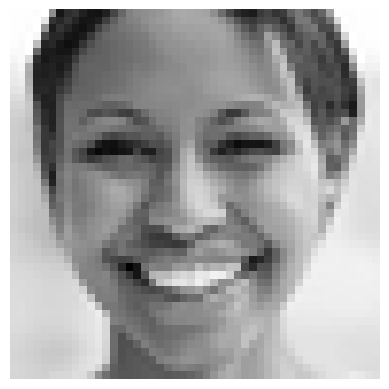

In [358]:
show(train_images[445])

**Eğitim kümesinde kaç sınıf var**

In [359]:
train_labels_flat =train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print("Farklı yüz ifadelerin sayısı %d"%train_labels_count)

Farklı yüz ifadelerin sayısı 7


**One Hot İle Eğitim Kümesindeki Verilerin Her Birine Düşen Sınıfı yani Eğitim Boyutunu**

In [360]:
def dense_to_one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

In [361]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


**Test Verisi Ön İşleme**

In [362]:
np.unique(data["Usage"].values.ravel())

print("Test verisindeki örnek sayı: %d"%(len(data[data.Usage == "PublicTest"])))

Test verisindeki örnek sayı: 3589


In [363]:
test_data = data[data.Usage == "PublicTest"]
test_pixels = test_data.pixels.str.split(" ").tolist()

test_pixels = pd.DataFrame(test_pixels, dtype=float).fillna(0).astype(int)
test_images = test_pixels.values
test_images = test_images.astype(float)

print(test_images.shape)
#test örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık


(3589, 2304)


**Eğitim kümesinden bir örnek görsel**

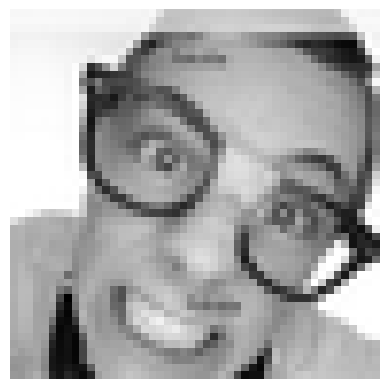

In [364]:
show(test_images[890])

**One Hot Test Kümesi**

In [365]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)
y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


**Test Kümesinden Örnek Görüntüler**

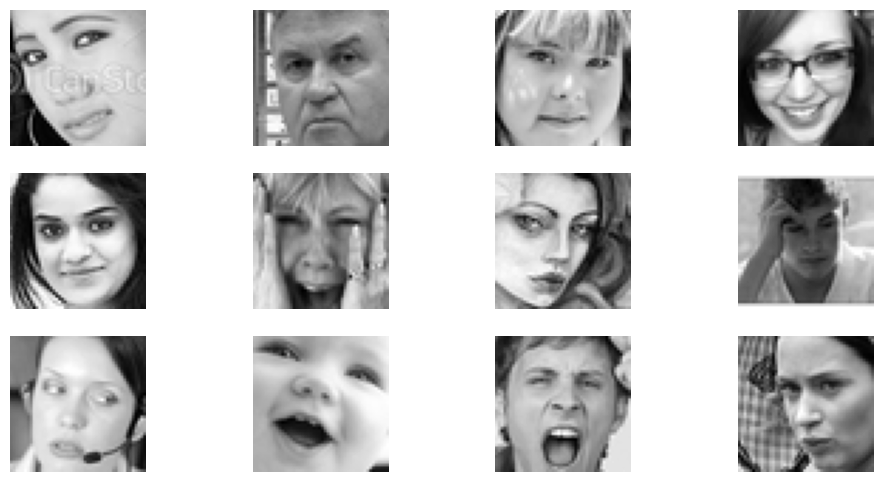

In [366]:
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.axis('off')

    image=test_images[i].reshape(48,48)
    plt.imshow(image, cmap='gray')

plt.tight_layout
plt.show()

**Derin Evrişimli Sinir Ağ Modeli Tanımlanması**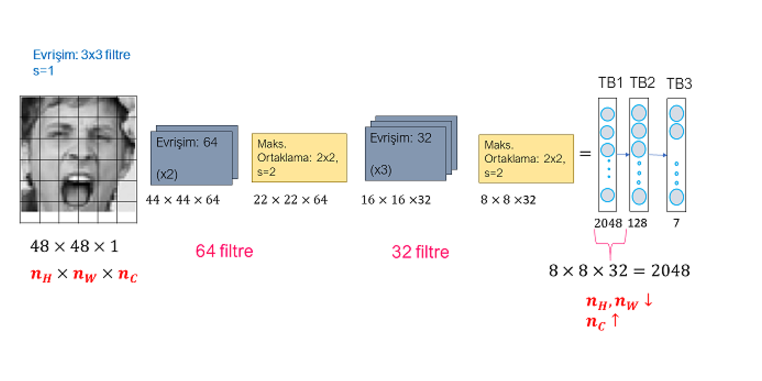

In [367]:
# Model tanımı
model = Sequential()

# 1. Katman
model.add(Conv2D(64, (3, 3), data_format="channels_last", kernel_initializer="he_normal", input_shape=(48, 48, 1)))
model.add(BatchNormalization()) # Now BatchNormalization is recognized
model.add(Activation("relu"))

# 2. Katman
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6)) # %60 unutma işlemi

# 3. Katman
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# 4. Katman
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# 5. Katman
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6)) # %60 unutma işlemi

# Tam bağlantı katmanı
model.add(Flatten())
model.add(Dense(128))  # 128 nöronlu tam bağlantı katmanı
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))  # 60% dropout uygulandı

# Çıkış katmanı
model.add(Dense(7))  # 7 sınıf (duygu sınıfı) için çıkış nöronu
model.add(Activation("softmax"))  # Sınıflandırma işlemi için softmax aktivasyonu

# Modelin derlenmesi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Kayıp fonksiyonu ve optimizasyon
model.summary()  # Model özetini yazdır

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_49 (Activation)           │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_50 (Activation)           │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 20, 20, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 20, 20, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 18, 18, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 18, 18, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_53 (Activation)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 8, 8, 32)            │              

 Total params: 339,111 (1.29 MB)

 Trainable params: 338,407 (1.29 MB)

 Non-trainable params: 704 (2.75 KB)

**Eğitim ve Test Kümelerinin Eleman Sayısı Yükseklik ve Genişlik Kanal Sayısı Bilgileri**

In [368]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print("Train:", x_train.shape)
print("Test:", x_test.shape)


Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


**Eğitim ve Test Kümelerinin Eleman Duygu Sınıf Sayısı**

In [369]:
print("Train:", y_train.shape)
print("Test:", y_test.shape)


Train: (28709, 7)
Test: (3589, 7)


**Eğitim işleminin gerçekleşmesini istediğimiz epoch, batchsize gibi değerlerin belirlenmesi ve eğitim sonucunda ağırlıkların .h5 dosyası olarak kaydedilmesi işlemleri**

In [370]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the root directory where you want to save the model files
root = './'  # Or your desired path, e.g., '/content/drive/My Drive/'

# en başarılı ağırlıkları kaydet
# Change the filepath to end with '.keras'
checkpointer = ModelCheckpoint(filepath=root + 'data/face_model.keras', verbose=1, save_best_only=True)

epochs = 10
batchSize = 100

# modeli çalıştır
hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + "data/face_model.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.62009, saving model to ./data/face_model.keras
288/288 - 14s - 48ms/step - accuracy: 0.2560 - loss: 1.9986 - val_accuracy: 0.3608 - val_loss: 1.6201
Epoch 2/10

Epoch 2: val_loss improved from 1.62009 to 1.53193, saving model to ./data/face_model.keras
288/288 - 2s - 6ms/step - accuracy: 0.3492 - loss: 1.6558 - val_accuracy: 0.4124 - val_loss: 1.5319
Epoch 3/10

Epoch 3: val_loss improved from 1.53193 to 1.42208, saving model to ./data/face_model.keras
288/288 - 2s - 6ms/step - accuracy: 0.3984 - loss: 1.5453 - val_accuracy: 0.4478 - val_loss: 1.4221
Epoch 4/10

Epoch 4: val_loss improved from 1.42208 to 1.35503, saving model to ./data/face_model.keras
288/288 - 2s - 6ms/step - accuracy: 0.4296 - loss: 1.4658 - val_accuracy: 0.4706 - val_loss: 1.3550
Epoch 5/10

Epoch 5: val_loss improved from 1.35503 to 1.30903, saving model to ./data/face_model.keras
288/288 - 2s - 6ms/step - accuracy: 0.4529 - loss: 1.4138 - val_accuracy: 0.4965 -

**Eğitim sonucu elde edilen Eğitim ve Validation sonuçlarının grafikle gösterilmesi**

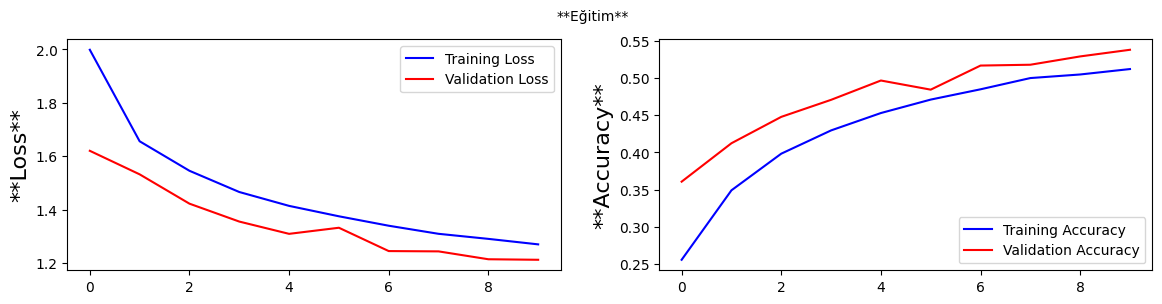

In [371]:
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.suptitle('**Eğitim**', fontsize=10)
plt.ylabel('**Loss**', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('**Accuracy**', fontsize=16)
# Change 'acc' to 'accuracy' and 'val_acc' to 'val_accuracy'
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [372]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


Kaggle submit edecek gibi Private örnekleri test edelim

In [373]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [374]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [375]:
import tensorflow as tf

x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = tf.keras.utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [376]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerinde doğruluk başarımı:", score)

PrivateTest üzerinde doğruluk başarımı: [1.2115240097045898, 0.5391473770141602]


**Farklı görüntülerle test işlemlerini yapıp sonuçları görselleştirelim.**

In [377]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Import load_img and img_to_array
import numpy as np
from tensorflow.keras.models import load_model # Assuming you need this import


**Daha önceki eğitimde kaydettiğimiz modelin hesapladığını öğrenilmiş ağırlık dosyasını kullanıyoruz**

In [381]:
root = '/content/gdrive/MyDrive/Colab Notebooks/Yapay Zeka/'
model_best = load_model(root + 'data/face_model.keras')
import os
os.chdir(root + 'images')

In [387]:
image_path = root + "images/kemal_sunal2.png"

# Use load_img directly instead of image.load_img
test_image_original = load_img(image_path) # orjinal renkli görüntü

# Use color_mode='grayscale' instead of grayscale=True
test_image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')
test_data = img_to_array(test_image) # Use img_to_array directly

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.10396622, 0.00834668, 0.06821905, 0.4444946 , 0.17672817,
        0.01009977, 0.18814556]], dtype=float32)

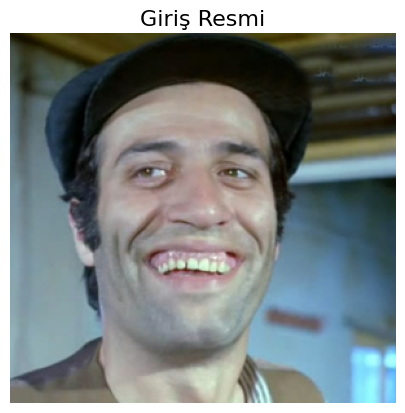

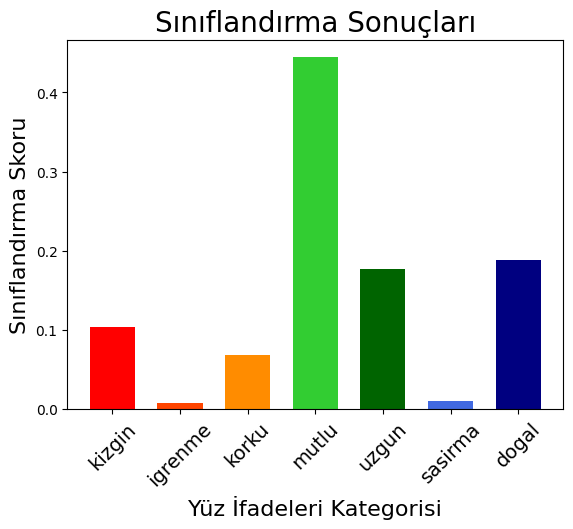

Sınıflandırma sonucu en yüksek oranla: mutlu


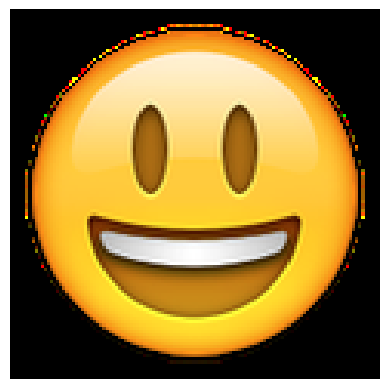

In [388]:
#sınıflarımız 7 adet duygu durumumuz
class_names = ['kizgin', 'igrenme', 'korku', 'mutlu', 'uzgun', 'sasirma', 'dogal']

ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4  #bar genişliği

color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']

# test resmimizi çizdirelim

plt.imshow(test_image_original)
plt.title('Giriş Resmi', fontsize=16)
plt.axis('off')
plt.show()

#sonuçlarımızı renklendirelim

for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])

plt.title("Sınıflandırma Sonuçları", fontsize=20)
plt.xlabel("Yüz İfadeleri Kategorisi",fontsize=16)
plt.ylabel("Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("Sınıflandırma sonucu en yüksek oranla:", class_names[np.argmax(results)])

# en yüksek skorlu duyguya karşılık emoji çizdirelim

emojis_img = load_img(root + 'images/emojis/%s.png' % str(class_names[np.argmax(results)]))


plt.imshow(emojis_img)
plt.axis('off')
plt.show()